In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the cleaned dataset
import pandas as pd
dataset_path = r"C:\Users\harsh\Desktop\dv\Cleaned_Dataset.xlsx"
df = pd.read_excel(dataset_path)

In [3]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [4]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

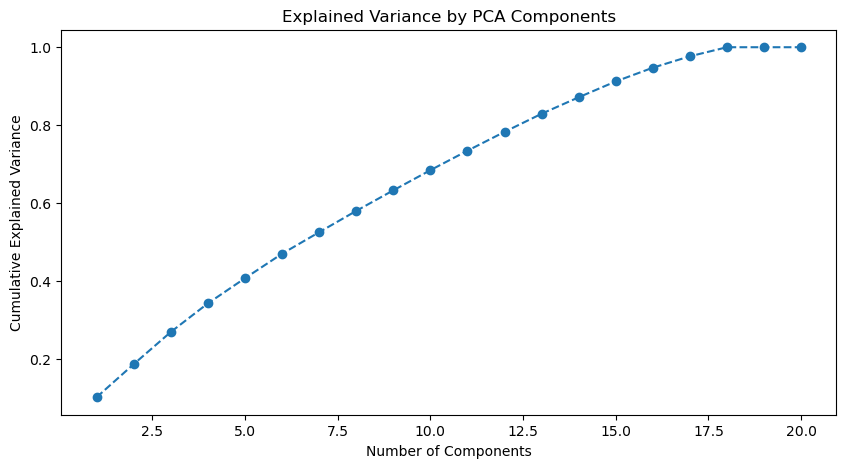

In [5]:
# Explained variance ratio plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [6]:
# Determine the optimal number of components (e.g., 95% variance)
import numpy as np
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 17


In [7]:
# Apply PCA with optimal components

from sklearn.decomposition import PCA
pca_optimal = PCA(n_components=optimal_components)
pca_transformed = pca_optimal.fit_transform(df_scaled)

In [8]:
# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.105330  0.140789 -0.604973  0.182502  0.184084 -0.053229 -0.184031   
1  1.111315  0.287291 -0.435445 -0.148173 -0.295406  0.027515 -1.121356   
2  0.935361  0.203754 -0.931744 -0.877121 -0.291846  0.307497 -0.770084   
3  1.448020 -1.199813 -0.630390  0.159950 -0.257863  0.332966  0.761682   
4  1.110216  0.287732 -0.436487 -0.146695 -0.294254  0.027349 -1.115915   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.229347  0.114162  0.253013 -0.444416 -0.587179 -0.081130  0.008921   
1 -0.244271  0.659219  0.556429  0.122432 -0.725367  0.977841 -0.134844   
2 -0.258040  0.699606  0.357986  0.178288 -0.161908  1.044752 -0.842773   
3 -1.686979  1.947670  1.315928  0.355172  0.405342  0.542128 -0.023807   
4 -0.240694  0.656056  0.553381  0.120346 -0.723521  0.972519 -0.133372   

       PC15      PC16      PC17  
0  0.823695 -0.447555 -0.149198  
1  1.075429 -0.191248 -0.36482

In [ ]:
 Random Forest for predicting whether a person buys a policy.

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [11]:
# Load the cleaned dataset
import pandas as pd
dataset_path =  r"C:\Users\harsh\Desktop\dv\Cleaned_Dataset.xlsx"
df = pd.read_excel(dataset_path)

In [12]:
# Assuming the target column is named 'Buys_Policy' (modify if needed)
target_column = 'outcome'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

In [13]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [16]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:

# Make predictions
y_pred = rf_model.predict(X_test)

In [18]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9453
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       192
           1       0.00      0.00      0.00         9

    accuracy                           0.95       201
   macro avg       0.48      0.49      0.49       201
weighted avg       0.91      0.95      0.93       201



In [ ]:
Random Forest model is now tuned using GridSearchCV!

In [19]:
# Load the cleaned dataset
import pandas as pd
dataset_path =  r"C:\Users\harsh\Desktop\dv\Cleaned_Dataset.xlsx"
df = pd.read_excel(dataset_path)

In [20]:
# Assuming the target column is named 'Buys_Policy' (modify if needed)
target_column = 'outcome'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

In [21]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

In [23]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [24]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [25]:
# Best model after tuning
best_rf_model = grid_search.best_estimator_

In [26]:
# Make predictions
y_pred = best_rf_model.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Tuned Model Accuracy: 0.9502
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       192
           1       0.00      0.00      0.00         9

    accuracy                           0.95       201
   macro avg       0.48      0.50      0.49       201
weighted avg       0.91      0.95      0.93       201



In [28]:

# Display best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
